In [34]:
# Img size = (ih,iw)
# ker size = (kh,kw)
# stride = 2
# feature_map = [(ih-kh)/s + 1, (iw-kw)/s + 1]

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from keras.datasets import fashion_mnist,mnist

In [37]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [38]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [39]:

#     0: T-shirt/top
#     1: Trouser
#     2: Pullover
#     3: Dress
#     4: Coat
#     5: Sandal
#     6: Shirt
#     7: Sneaker
#     8: Bag
#     9: Ankle boot


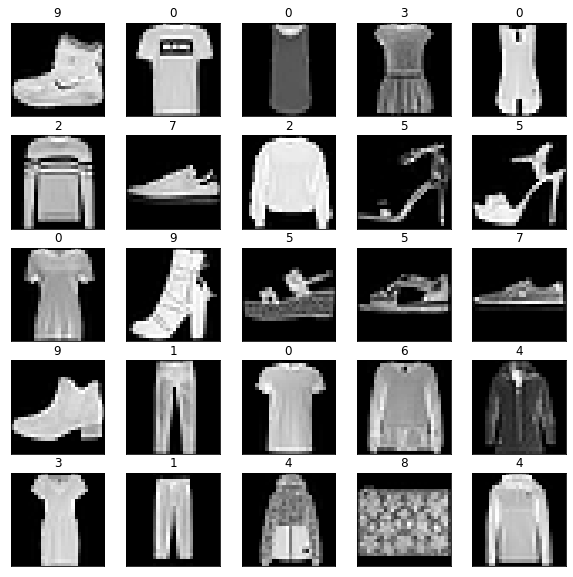

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i])
plt.show()

In [41]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [42]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [43]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [44]:
#### Normalizing the pixels

x_train = x_train/255 
x_test = x_test/255


#### Reshaoeing the data
x_train = x_train.reshape(5000,28,28,1)
x_test = x_test.reshape(1000,28,28,1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


### Build the CNN Architecture

In [45]:
from tensorflow.python.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.python.keras.models import Sequential

In [68]:
m1 = Sequential()
m1.add(Conv2D(64, (3,3),activation='relu',input_shape=(28,28,1))) # 64 -> is the number of filters  ||| (3,3) -> is the filter size
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32, (3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(64,activation='relu'))
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='softmax'))   # 10 because total ten class are there ex - shoe,tishirt etc


m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [50]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
157/157 [==============================] - 8s 45ms/step - loss: 1.0364 - accuracy: 0.6328 - val_loss: 0.6921 - val_accuracy: 0.7180
Epoch 2/15
157/157 [==============================] - 7s 42ms/step - loss: 0.5772 - accuracy: 0.7866 - val_loss: 0.6214 - val_accuracy: 0.7810
Epoch 3/15
157/157 [==============================] - 5s 34ms/step - loss: 0.4938 - accuracy: 0.8178 - val_loss: 0.5521 - val_accuracy: 0.7990
Epoch 4/15
157/157 [==============================] - 5s 33ms/step - loss: 0.4565 - accuracy: 0.8352 - val_loss: 0.5141 - val_accuracy: 0.8190
Epoch 5/15
157/157 [==============================] - 5s 34ms/step - loss: 0.4211 - accuracy: 0.8476 - val_loss: 0.5116 - val_accuracy: 0.8240- los
Epoch 6/15
157/157 [==============================] - 6s 41ms/step - loss: 0.3950 - accuracy: 0.8578 - val_loss: 0.4914 - val_accuracy: 0.8490
Epoch 7/15
157/157 [==============================] - 5s 35ms/step - loss: 0.3554 - accuracy: 0.8766 - val_loss: 0.4649 - val_accuracy: 0

In [ ]:
r1 = pd.DataFrame(h1.history)
r1['Epoch'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epoch
10,0.274525,0.8998,0.480108,0.853,10
11,0.252082,0.9102,0.436113,0.857,11
12,0.234027,0.9148,0.427956,0.863,12
13,0.222665,0.9184,0.431306,0.868,13
14,0.209862,0.9234,0.447254,0.861,14


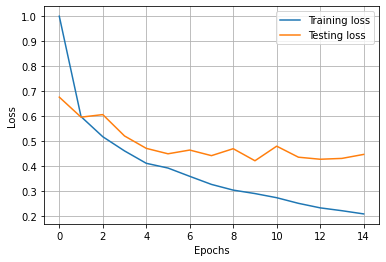

In [57]:
plt.plot(r1['Epoch'],r1['loss'],label='Training loss')
plt.plot(r1['Epoch'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

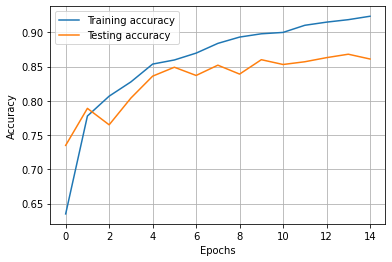

In [ ]:
plt.plot(r1['Epoch'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epoch'],r1['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [70]:
x_test.shape

(1000, 28, 28, 1)

In [64]:
ypred = m1.predict(x_test)
print(ypred)

[[5.7952554e-10 1.1912122e-11 1.3430150e-07 ... 1.0021492e-03
  1.8269997e-04 9.9881315e-01]
 [3.8199250e-05 1.2128996e-09 9.8049968e-01 ... 4.9432831e-09
  5.4267328e-09 3.9100261e-13]
 [2.9642699e-06 9.9999440e-01 6.7502470e-10 ... 2.3495769e-14
  1.1951733e-08 2.6447340e-15]
 ...
 [6.6510649e-05 5.3008149e-05 2.0802183e-02 ... 1.8499193e-06
  3.7384118e-04 3.8477692e-09]
 [9.5164018e-05 5.8554366e-07 4.5754394e-05 ... 9.9681598e-01
  3.7081988e-04 1.6959578e-03]
 [7.8450434e-08 1.9361315e-10 1.2068663e-06 ... 9.9998760e-01
  7.2017357e-08 1.2872744e-06]]


In [80]:
ypred.shape

(1000, 10)

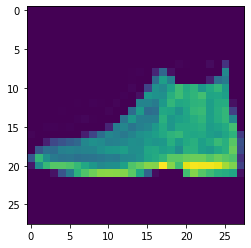

In [79]:
plt.imshow(x_test[0])
plt.show()

In [67]:
print(ypred[0])
print(sum(ypred[0])) # sum of all the probability
print(sum(ypred[465]))

[5.7952554e-10 1.1912122e-11 1.3430150e-07 2.2315986e-07 8.2175022e-12
 1.7029589e-06 6.1491756e-10 1.0021492e-03 1.8269997e-04 9.9881315e-01]
1.0000000631039108
1.0000000449310562


In [ ]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
ypred_m1 = [np.argmax(i) for i in ypred]
print(ypred_m1)

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5, 1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 9, 6, 7, 2, 1, 6, 6, 6, 6, 5, 6, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4, 1, 3, 5, 6, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 0, 5, 6, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 2, 6, 2, 9, 7, 6, 5, 5, 4, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 2, 3, 0, 4, 2, 7, 5, 3, 5, 9, 5, 6, 5, 5, 1, 9, 8, 3, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 2, 6, 2, 4, 7, 1, 6, 4, 2, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 7, 6, 

In [77]:
res1 = pd.DataFrame({'y_test':y_test,'y_pred':[*ypred_m1]})
res1.tail()


,y_test,y_pred
995,9,9
996,3,3
997,4,4
998,7,7
999,7,7


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[ 89   0   2   6   0   2   7   0   1   0]
 [  0 103   0   2   0   0   0   0   0   0]
 [  2   0  88   1   9   0  11   0   0   0]
 [  1   1   1  83   1   0   5   0   1   0]
 [  0   0   9   6  88   1  11   0   0   0]
 [  0   0   0   0   0  82   0   3   0   2]
 [ 16   0   7   5   8   0  61   0   0   0]
 [  0   0   0   0   0   0   0  89   0   6]
 [  3   0   2   1   0   0   2   0  87   0]
 [  0   0   0   0   0   1   0   3   0  91]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       107
           1       0.99      0.98      0.99       105
           2       0.81      0.79      0.80       111
           3       0.80      0.89      0.84        93
           4       0.83      0.77      0.80       115
           5       0.95      0.94      0.95        87
           6       0.63      0.63      0.63        97
           7       0.94      0.94      0.94        95
           8       0.98      0.92      0.95        95
           9       0.92     

### Saving the Model 

In [ ]:
m1.save('save_fashion_mnist.h5')

#### Streamlit Deployment